In [20]:
import numpy as np

import pandas as pd

from pandas import Series,DataFrame

import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('./usa_election.csv',low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536041 entries, 0 to 536040
Data columns (total 16 columns):
cmte_id              536041 non-null object
cand_id              536041 non-null object
cand_nm              536041 non-null object
contbr_nm            536041 non-null object
contbr_city          536026 non-null object
contbr_st            536040 non-null object
contbr_zip           535973 non-null object
contbr_employer      525088 non-null object
contbr_occupation    530520 non-null object
contb_receipt_amt    536041 non-null float64
contb_receipt_dt     536041 non-null object
receipt_desc         8479 non-null object
memo_cd              49718 non-null object
memo_text            52740 non-null object
form_tp              536041 non-null object
file_num             536041 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 65.4+ MB


In [22]:
'''
cand_nm – 接受捐赠的候选人姓名
contbr_nm – 捐赠人姓名
contbr_st – 捐赠人所在州
contbr_zip - 捐赠者邮编
contbr_employer – 捐赠人所在公司
contbr_occupation – 捐赠人职业
contb_receipt_amt – 捐赠数额（美元）
contb_receipt_dt – 收到捐款的日期'''
df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


### 数据预览和基本统计分析

In [23]:
df.shape

(536041, 16)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536041 entries, 0 to 536040
Data columns (total 16 columns):
cmte_id              536041 non-null object
cand_id              536041 non-null object
cand_nm              536041 non-null object
contbr_nm            536041 non-null object
contbr_city          536026 non-null object
contbr_st            536040 non-null object
contbr_zip           535973 non-null object
contbr_employer      525088 non-null object
contbr_occupation    530520 non-null object
contb_receipt_amt    536041 non-null float64
contb_receipt_dt     536041 non-null object
receipt_desc         8479 non-null object
memo_cd              49718 non-null object
memo_text            52740 non-null object
form_tp              536041 non-null object
file_num             536041 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 65.4+ MB


In [25]:
# 数值型的数据进行描述
df.describe()

,contb_receipt_amt,file_num
count,5.360410e+05,536041.000000
mean,3.750373e+02,761472.107800
std,3.564436e+03,5148.893508
min,-3.080000e+04,723511.000000
25%,5.000000e+01,756218.000000
50%,1.000000e+02,763233.000000
75%,2.500000e+02,763621.000000
max,1.944042e+06,767394.000000


### 数据清洗

In [26]:
# 政治献金者的公司
# 政治献金者的职业
df['contbr_employer'].fillna('NOT_PROVIDE',inplace = True)
df['contbr_occupation'].fillna('NOT_PROVIDE',inplace = True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536041 entries, 0 to 536040
Data columns (total 16 columns):
cmte_id              536041 non-null object
cand_id              536041 non-null object
cand_nm              536041 non-null object
contbr_nm            536041 non-null object
contbr_city          536026 non-null object
contbr_st            536040 non-null object
contbr_zip           535973 non-null object
contbr_employer      536041 non-null object
contbr_occupation    536041 non-null object
contb_receipt_amt    536041 non-null float64
contb_receipt_dt     536041 non-null object
receipt_desc         8479 non-null object
memo_cd              49718 non-null object
memo_text            52740 non-null object
form_tp              536041 non-null object
file_num             536041 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 65.4+ MB


### 数据转换

#### 党派分析

In [28]:
df['cand_nm'].unique()

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [29]:
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

In [30]:
%%time
# 增加一列，研究党派
df['party'] = df['cand_nm'].map(parties)

Wall time: 65.4 ms


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536041 entries, 0 to 536040
Data columns (total 17 columns):
cmte_id              536041 non-null object
cand_id              536041 non-null object
cand_nm              536041 non-null object
contbr_nm            536041 non-null object
contbr_city          536026 non-null object
contbr_st            536040 non-null object
contbr_zip           535973 non-null object
contbr_employer      536041 non-null object
contbr_occupation    536041 non-null object
contb_receipt_amt    536041 non-null float64
contb_receipt_dt     536041 non-null object
receipt_desc         8479 non-null object
memo_cd              49718 non-null object
memo_text            52740 non-null object
form_tp              536041 non-null object
file_num             536041 non-null int64
party                536041 non-null object
dtypes: float64(1), int64(1), object(15)
memory usage: 69.5+ MB


In [32]:
df['party'].unique()

array(['Republican', 'Democrat'], dtype=object)

#### 排序：按照职业汇总对赞助总金额进行排序

In [33]:
# 分组聚合
df.groupby(by = ['contbr_occupation'])['contb_receipt_amt'].sum().sort_values(ascending = False)

contbr_occupation
RETIRED                                   29865435.00
ATTORNEY                                  12580812.94
HOMEMAKER                                 12410217.32
INFORMATION REQUESTED PER BEST EFFORTS     9832750.00
INFORMATION REQUESTED                      6652373.48
                                             ...     
ELEVATOR OPERATOR                                0.00
MFG. REP                                       -50.00
AVIATION ATTORNEY                            -2500.00
PRES OF GAS & ELECTRIC                       -2500.00
METAL SMITH                                  -4250.00
Name: contb_receipt_amt, Length: 29620, dtype: float64

#### 利用重复职业名称，进行数据的变换

In [36]:
# 职业360行，数据汇总，29620个不同职业，重合
# 数据变换
occupationn_map= {'C.E.O.':'CEO',
                 'LAWYER':'ATTORNEY',
                  'INFORMATION REQUESTED PER BEST EFFORTS':'NOT_PROVIDE',
                  'INFORMATION REQUESTED':'NOT_PROVIDE',
                  'C.P.A.':'CPA'}
f = lambda x :occupationn_map.get(x,x)
df['contbr_occupation'] = df['contbr_occupation'].map(f)

In [37]:
# 分组聚合
df.groupby(by = ['contbr_occupation'])['contb_receipt_amt'].sum().sort_values(ascending = False)[:50]

contbr_occupation
RETIRED                  29865435.00
NOT_PROVIDE              17941261.68
ATTORNEY                 14886648.73
HOMEMAKER                12410217.32
PHYSICIAN                 4732676.66
PRESIDENT                 4663978.28
CEO                       4455427.37
EXECUTIVE                 3897020.71
CONSULTANT                3445289.59
INVESTOR                  2499492.16
OWNER                     2397779.75
ENGINEER                  1743040.13
REAL ESTATE               1668360.55
PROFESSOR                 1524503.64
MANAGER                   1429909.01
SELF-EMPLOYED             1374817.30
CHAIRMAN                  1339631.37
FINANCE                   1330261.88
SALES                     1225337.97
BUSINESS OWNER            1179904.84
STUDENT                   1155684.17
BANKER                    1133177.68
NOT EMPLOYED              1065220.57
TEACHER                    984944.53
PARTNER                    933350.51
INVESTMENTS                884374.03
VICE PRESIDENT      

### 赞助金额筛选

In [40]:
cond = df['contb_receipt_amt'] > 0
df2 = df[cond]
df2.describe()

,contb_receipt_amt,file_num
count,5.303140e+05,530314.000000
mean,3.931043e+02,761487.469446
std,3.576869e+03,5139.973314
min,1.000000e-02,723511.000000
25%,5.000000e+01,756218.000000
50%,1.000000e+02,763233.000000
75%,2.500000e+02,763621.000000
max,1.944042e+06,767394.000000


#### 根据候选人进行分组计算政治献金总额，排序

In [41]:
df2.groupby(by = ['cand_nm'])['contb_receipt_amt'].sum().sort_values(ascending = False)

cand_nm
Obama, Barack                     8.259441e+07
Romney, Mitt                      5.702315e+07
Perry, Rick                       2.020167e+07
Paul, Ron                         1.559408e+07
Gingrich, Newt                    9.895836e+06
Cain, Herman                      7.058163e+06
Pawlenty, Timothy                 5.978124e+06
Santorum, Rick                    3.364115e+06
Huntsman, Jon                     3.324373e+06
Bachmann, Michelle                2.639510e+06
Johnson, Gary Earl                4.132769e+05
Roemer, Charles E. 'Buddy' III    3.429658e+05
McCotter, Thaddeus G              3.903000e+04
Name: contb_receipt_amt, dtype: float64

In [ ]:
'''Obama, Barack                     8.259441e+07
Romney, Mitt                      5.702315e+07
Perry, Rick                       2.020167e+07
Paul, Ron                         1.559408e+07'''
# 收到捐款总额排名前四，最优希望赢得大选

#### 将前两名的候选人筛选出来


In [45]:
cond1 = df2['cand_nm'] == 'Romney, Mitt'
cond2 = df2['cand_nm'] == 'Obama, Barack'
cond = cond1 | cond2
df_vs = df2[cond]
df_vs.shape

(347470, 17)

In [44]:
# isin 数据是否在列表中包含
cond = df2['cand_nm'].isin(['Obama, Barack','Romney, Mitt'])
df_vs = df2[cond]
df_vs.shape

(347470, 17)

### 面元化操作

In [49]:
# 分箱操作
amt = df_vs['contb_receipt_amt'].unique()
amt.sort()
amt

array([1.00000000e-02, 2.50000000e-01, 4.00000000e-01, ...,
       5.12710910e+05, 1.51119217e+06, 1.94404243e+06])

In [50]:
bins = [0,1,10,100,1000,10000,100000,1000000,10000000]
labels = pd.cut(df_vs['contb_receipt_amt'],bins)
labels

409       (1000, 10000]
410         (100, 1000]
411         (100, 1000]
412         (100, 1000]
413         (100, 1000]
              ...      
351224        (10, 100]
351225        (10, 100]
351226    (1000, 10000]
351227    (1000, 10000]
351228        (10, 100]
Name: contb_receipt_amt, Length: 347470, dtype: category
Categories (8, interval[int64]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

In [52]:
df_vs['label'] = labels

d:\python3.7.4\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
df_vs.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party,label
409,C00431171,P80003353,"Romney, Mitt","EDWARDS, BRYANT MR.",LONDON UK,AE,90071,LATHAM & WATKINS,ATTORNEY,2500.0,20-JUN-11,NaN,NaN,NaN,SA17A,760248,Republican,"(1000, 10000]"
410,C00431171,P80003353,"Romney, Mitt","DELUCA, PIERRE",APO,AE,091280005,CISCO,ENGINEER,250.0,28-APR-11,NaN,NaN,NaN,SA17A,760248,Republican,"(100, 1000]"
411,C00431171,P80003353,"Romney, Mitt","DELUCA, PIERRE",APO,AE,091280005,CISCO,ENGINEER,250.0,27-JUN-11,NaN,NaN,NaN,SA17A,760248,Republican,"(100, 1000]"
412,C00431171,P80003353,"Romney, Mitt","KAMMER, DONALD",APO,AE,09267,US,MILITARY,500.0,31-DEC-11,NaN,NaN,NaN,SA17A,763507,Republican,"(100, 1000]"
413,C00431171,P80003353,"Romney, Mitt","CLAUDE, FOUKS",PARIS FRANCE,AE,75011,PALPATINE,SECRET,250.0,29-DEC-11,NaN,NaN,NaN,SA17A,763507,Republican,"(100, 1000]"


### 透视表分析党派和职业

In [57]:
df_vs2 = df_vs.pivot_table(values='contb_receipt_amt',index = 'contbr_occupation',columns='party',aggfunc='sum')
df_vs2

party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN
...,...,...
YOUTH SERVICES LIBRARIAN,290.0,NaN
YOUTH SPECIALIST,525.0,NaN
ZEN BUDDHIST PRIEST,300.0,NaN


In [58]:
df_vs2.fillna(0,inplace = True)

In [62]:
df_vs2

party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,0.0
AREA VICE PRESIDENT,250.0,0.0
RESEARCH ASSOCIATE,100.0,0.0
TEACHER,500.0,0.0
THERAPIST,3900.0,0.0
...,...,...
YOUTH SERVICES LIBRARIAN,290.0,0.0
YOUTH SPECIALIST,525.0,0.0
ZEN BUDDHIST PRIEST,300.0,0.0


In [64]:
total = DataFrame(df_vs2.sum(axis = 1),columns=['total'])
total

,total
contbr_occupation,
MIXED-MEDIA ARTIST / STORYTELLER,100.0
AREA VICE PRESIDENT,250.0
RESEARCH ASSOCIATE,100.0
TEACHER,500.0
THERAPIST,3900.0
...,...
YOUTH SERVICES LIBRARIAN,290.0
YOUTH SPECIALIST,525.0
ZEN BUDDHIST PRIEST,300.0


In [65]:
df_vs3 = pd.merge(df_vs2,total,left_index=True,right_index=True)
df_vs3

,Democrat,Republican,total
contbr_occupation,,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,0.0,100.0
AREA VICE PRESIDENT,250.0,0.0,250.0
RESEARCH ASSOCIATE,100.0,0.0,100.0
TEACHER,500.0,0.0,500.0
THERAPIST,3900.0,0.0,3900.0
...,...,...,...
YOUTH SERVICES LIBRARIAN,290.0,0.0,290.0
YOUTH SPECIALIST,525.0,0.0,525.0
ZEN BUDDHIST PRIEST,300.0,0.0,300.0


In [67]:
df_vs4 = df_vs3.sort_values(by = 'total',ascending=False)
df_vs4[:20]

,Democrat,Republican,total
contbr_occupation,,,
RETIRED,15103811.07,6570601.24,21674412.31
NOT_PROVIDE,7214735.33,6683258.06,13897993.39
ATTORNEY,9089821.27,3697735.21,12787556.48
HOMEMAKER,2784593.60,5464673.84,8249267.44
PHYSICIAN,2244445.92,790381.04,3034826.96
CEO,1426163.67,1558278.84,2984442.51
PRESIDENT,1285419.95,1545556.99,2830976.94
CONSULTANT,1636016.36,925820.38,2561836.74
EXECUTIVE,972931.63,1458961.36,2431892.99


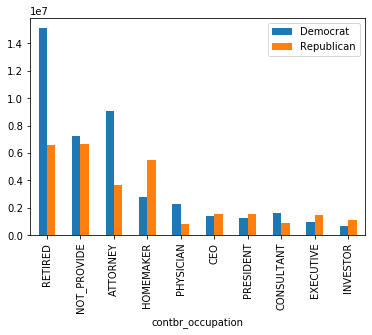

In [70]:
df_vs4.iloc[:,:2][:10].plot(kind = 'bar')

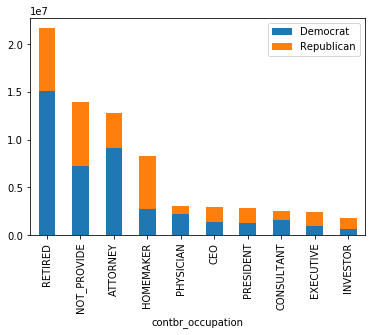

In [71]:
df_vs4.iloc[:,:2][:10].plot(kind = 'bar',stacked = True)

### 根据职业和雇主进行分组运算

In [72]:
# 依然根据df_vs，这个数据进行分析
df_vs

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party,label
409,C00431171,P80003353,"Romney, Mitt","EDWARDS, BRYANT MR.",LONDON UK,AE,90071,LATHAM & WATKINS,ATTORNEY,2500.0,20-JUN-11,NaN,NaN,NaN,SA17A,760248,Republican,"(1000, 10000]"
410,C00431171,P80003353,"Romney, Mitt","DELUCA, PIERRE",APO,AE,091280005,CISCO,ENGINEER,250.0,28-APR-11,NaN,NaN,NaN,SA17A,760248,Republican,"(100, 1000]"
411,C00431171,P80003353,"Romney, Mitt","DELUCA, PIERRE",APO,AE,091280005,CISCO,ENGINEER,250.0,27-JUN-11,NaN,NaN,NaN,SA17A,760248,Republican,"(100, 1000]"
412,C00431171,P80003353,"Romney, Mitt","KAMMER, DONALD",APO,AE,09267,US,MILITARY,500.0,31-DEC-11,NaN,NaN,NaN,SA17A,763507,Republican,"(100, 1000]"
413,C00431171,P80003353,"Romney, Mitt","CLAUDE, FOUKS",PARIS FRANCE,AE,75011,PALPATINE,SECRET,250.0,29-DEC-11,NaN,NaN,NaN,SA17A,763507,Republican,"(100, 1000]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351224,C00431445,P80003338,"Obama, Barack","MOUNTS, ROBERT",APO,ZZ,962043077,HQ USFK (FKDC-SA),GS-15 INTERNATIONAL RELATIONS OFFICER,25.0,26-NOV-11,NaN,NaN,NaN,SA17A,763233,Democrat,"(10, 100]"
351225,C00431445,P80003338,"Obama, Barack","MOUNTS, ROBERT",APO,ZZ,962043077,HQ USFK (FKDC-SA),GS-15 INTERNATIONAL RELATIONS OFFICER,25.0,26-JAN-12,NaN,NaN,NaN,SA17A,766535,Democrat,"(10, 100]"
351226,C00431445,P80003338,"Obama, Barack","JONES, LESLIE",HAMILTON PARISH,ZZ,0CR04,SELF-EMPLOYED,ATTORNEY,2500.0,30-DEC-11,NaN,X,* OBAMA VICTORY FUND 2012,SA18,763233,Democrat,"(1000, 10000]"
351227,C00431445,P80003338,"Obama, Barack","JONES, LESLIE",HAMILTON PARISH,ZZ,0CR04,SELF-EMPLOYED,ATTORNEY,2500.0,30-DEC-11,NaN,X,* OBAMA VICTORY FUND 2012,SA18,763233,Democrat,"(1000, 10000]"


In [101]:
# 首选进行了分组，没有运算
g = df_vs.groupby('cand_nm')
def get_top_amount(g,key = 'contbr_occupation',n = 5):
    return g.groupby(key)['contb_receipt_amt'].sum().sort_values(ascending = False)[:n]
# 将分组结果，apply
# apply中的方法自己定义
g.apply(get_top_amount,'contbr_occupation',n = 15)

cand_nm        contbr_occupation
Obama, Barack  RETIRED              15103811.07
               ATTORNEY              9089821.27
               NOT_PROVIDE           7214735.33
               HOMEMAKER             2784593.60
               PHYSICIAN             2244445.92
               CONSULTANT            1636016.36
               CEO                   1426163.67
               PROFESSOR             1322512.54
               PRESIDENT             1285419.95
               NOT EMPLOYED          1035639.53
               EXECUTIVE              972931.63
               TEACHER                691746.04
               WRITER                 687807.68
               OWNER                  643033.42
               INVESTOR               639607.00
Romney, Mitt   NOT_PROVIDE           6683258.06
               RETIRED               6570601.24
               HOMEMAKER             5464673.84
               ATTORNEY              3697735.21
               CEO                   1558278.84
       

In [ ]:
# 支持奥巴马：知识分子比较多
# 支持罗姆尼：高管比较多

In [97]:
# 分组聚合运算，方法二
df_vs5 = df_vs.groupby(by = ['cand_nm','contbr_occupation'])['contb_receipt_amt'].sum().sort_values(ascending = False)[:14]
df_vs6 = df_vs5.sort_index(level=0)
df_vs6.iloc[:7].sort_values(ascending = False).append(df_vs6.iloc[7:].sort_values(ascending = False))


cand_nm        contbr_occupation
Obama, Barack  RETIRED              15103811.07
               ATTORNEY              9089821.27
               NOT_PROVIDE           7214735.33
               HOMEMAKER             2784593.60
               PHYSICIAN             2244445.92
               CONSULTANT            1636016.36
               CEO                   1426163.67
Romney, Mitt   NOT_PROVIDE           6683258.06
               RETIRED               6570601.24
               HOMEMAKER             5464673.84
               ATTORNEY              3697735.21
               CEO                   1558278.84
               PRESIDENT             1545556.99
               EXECUTIVE             1458961.36
Name: contb_receipt_amt, dtype: float64

In [100]:
g = df_vs.groupby('cand_nm')
def get_top_amount(g,key = 'contbr_occupation',n = 5):
    return g.groupby(key)['contb_receipt_amt'].sum().sort_values(ascending = False)[:n]
# 将分组结果，apply
# apply中的方法自己定义
g.apply(get_top_amount,'contbr_employer',n = 15)

cand_nm        contbr_employer                       
Obama, Barack  RETIRED                                   14519353.14
               SELF-EMPLOYED                              9946404.76
               NOT_PROVIDE                                4559691.03
               NOT EMPLOYED                               3808329.55
               INFORMATION REQUESTED                      2742344.81
               HOMEMAKER                                  2029236.95
               SELF                                       1054984.00
               SELF EMPLOYED                               459404.00
               STUDENT                                     251293.45
               VOLUNTEER                                   222504.00
               MICROSOFT                                   107014.00
               HARVARD UNIVERSITY                           88631.44
               MORGAN & MORGAN                              86750.00
               DLA PIPER                         

In [ ]:
# 支持奥巴马：科技公司
# 支持罗姆尼：大财团，金融公司

#### 对赞助金额进行分组分析

In [103]:
df_vs.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party,label
409,C00431171,P80003353,"Romney, Mitt","EDWARDS, BRYANT MR.",LONDON UK,AE,90071,LATHAM & WATKINS,ATTORNEY,2500.0,20-JUN-11,NaN,NaN,NaN,SA17A,760248,Republican,"(1000, 10000]"
410,C00431171,P80003353,"Romney, Mitt","DELUCA, PIERRE",APO,AE,091280005,CISCO,ENGINEER,250.0,28-APR-11,NaN,NaN,NaN,SA17A,760248,Republican,"(100, 1000]"
411,C00431171,P80003353,"Romney, Mitt","DELUCA, PIERRE",APO,AE,091280005,CISCO,ENGINEER,250.0,27-JUN-11,NaN,NaN,NaN,SA17A,760248,Republican,"(100, 1000]"
412,C00431171,P80003353,"Romney, Mitt","KAMMER, DONALD",APO,AE,09267,US,MILITARY,500.0,31-DEC-11,NaN,NaN,NaN,SA17A,763507,Republican,"(100, 1000]"
413,C00431171,P80003353,"Romney, Mitt","CLAUDE, FOUKS",PARIS FRANCE,AE,75011,PALPATINE,SECRET,250.0,29-DEC-11,NaN,NaN,NaN,SA17A,763507,Republican,"(100, 1000]"


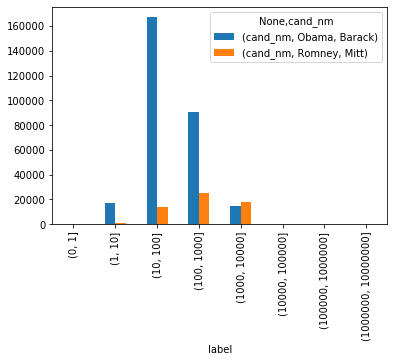

In [112]:
df_vs7 = df_vs.groupby(by = ['cand_nm','label'])[['cand_nm']].count()
df_vs7.unstack(level = 0).plot(kind = 'bar')

In [ ]:
# 小额捐款，奥巴马遥遥领先
# 大额捐款，罗姆尼领先

In [109]:
df_vs.groupby(['cand_nm'])['contb_receipt_amt'].sum()

cand_nm
Obama, Barack    82594408.87
Romney, Mitt     57023146.98
Name: contb_receipt_amt, dtype: float64

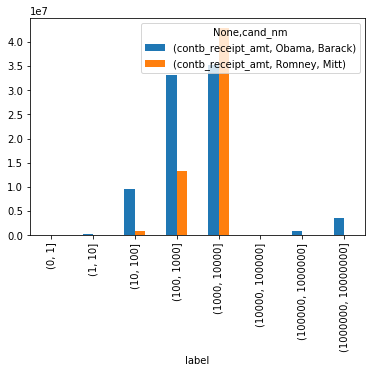

In [113]:
df_vs7 = df_vs.groupby(by = ['cand_nm','label'])[['contb_receipt_amt']].sum()
df_vs7.unstack(level = 0).plot(kind = 'bar')

In [125]:
# 百分比堆叠图
df_vs7 = df_vs.groupby(by = ['cand_nm','label'])[['contb_receipt_amt']].sum()
df_vs7 = df_vs7.unstack(level = 0)
df_vs7.fillna(0,inplace = True)
df_vs7

contb_receipt_amt             
cand_nm                 Obama, Barack Romney, Mitt
label                                             
(0, 1]                         170.49        37.00
(1, 10]                     148475.46      7139.38
(10, 100]                  9629239.82    897744.11
(100, 1000]               33231906.36  13261862.42
(1000, 10000]             35105845.23  42843664.07
(10000, 100000]              59100.00     12700.00
(100000, 1000000]           964436.91         0.00
(1000000, 10000000]        3455234.60         0.00

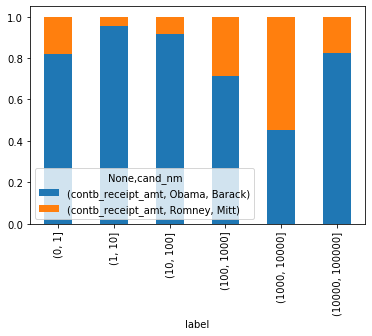

In [128]:
df_vs7.div(df_vs7.sum(axis = 1),axis = 0).iloc[:-2].plot(kind = 'bar',stacked = True)

#### 按照赞助人姓名分组计数，计算重复赞助次数最多的前20人

In [131]:
df_vs.groupby(['contbr_nm'])['cand_nm'].count().sort_values(ascending = False)[:20]

contbr_nm
WILLIAMS, DEBBY          154
HARRIS, CLAUDIA W.       127
SMITH, ERIK              126
FALLSGRAFF, TOBY         106
SKINNER, DONNA           102
HAUGHEY, NOEL ANTHONY     87
POTTS, LILLIE             82
SCHMITT, ROSELYN          77
HUNSUCKER, TARA           77
THOMPSON, TRACY ANNE      66
NURU, ISAAC               65
DUNGEY, DAVID             61
FARDIG, JUDITH A          60
DUDLEY, DEBBIE            59
ROSBERG, MARILYN          58
FRILOT, MARY              54
KUNESH, JASON             53
GALLAGHER, ELLEN          50
HAGERMAN, MARGARET        50
HAYS, PATRICIA            47
Name: cand_nm, dtype: int64

### 时间序列的处理

In [133]:
df_vs.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party,label
409,C00431171,P80003353,"Romney, Mitt","EDWARDS, BRYANT MR.",LONDON UK,AE,90071,LATHAM & WATKINS,ATTORNEY,2500.0,20-JUN-11,NaN,NaN,NaN,SA17A,760248,Republican,"(1000, 10000]"
410,C00431171,P80003353,"Romney, Mitt","DELUCA, PIERRE",APO,AE,091280005,CISCO,ENGINEER,250.0,28-APR-11,NaN,NaN,NaN,SA17A,760248,Republican,"(100, 1000]"
411,C00431171,P80003353,"Romney, Mitt","DELUCA, PIERRE",APO,AE,091280005,CISCO,ENGINEER,250.0,27-JUN-11,NaN,NaN,NaN,SA17A,760248,Republican,"(100, 1000]"
412,C00431171,P80003353,"Romney, Mitt","KAMMER, DONALD",APO,AE,09267,US,MILITARY,500.0,31-DEC-11,NaN,NaN,NaN,SA17A,763507,Republican,"(100, 1000]"
413,C00431171,P80003353,"Romney, Mitt","CLAUDE, FOUKS",PARIS FRANCE,AE,75011,PALPATINE,SECRET,250.0,29-DEC-11,NaN,NaN,NaN,SA17A,763507,Republican,"(100, 1000]"


In [138]:
df_vs['contb_receipt_dt'] = pd.to_datetime(df_vs['contb_receipt_dt'])

d:\python3.7.4\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [139]:
df_vs.dtypes

cmte_id                      object
cand_id                      object
cand_nm                      object
contbr_nm                    object
contbr_city                  object
contbr_st                    object
contbr_zip                   object
contbr_employer              object
contbr_occupation            object
contb_receipt_amt           float64
contb_receipt_dt     datetime64[ns]
receipt_desc                 object
memo_cd                      object
memo_text                    object
form_tp                      object
file_num                      int64
party                        object
label                      category
dtype: object

In [143]:
df_vs8 = df_vs.set_index('contb_receipt_dt').sort_index()

### 重采样和评率转换


In [144]:
df_vs8.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party,label
contb_receipt_dt,,,,,,,,,,,,,,,,,
2011-04-04,C00431445,P80003338,"Obama, Barack","HANNAHER, DANIEL",FARGO,ND,58103,SMALL BUSINESS ADMINISTRATION,REGIONAL ADMINISTRATOR,65.0,NaN,NaN,NaN,SA17A,756214,Democrat,"(10, 100]"
2011-04-04,C00431445,P80003338,"Obama, Barack","ROWLAND, WICK",NIWOT,CO,80503,CPT,CEO,100.0,NaN,NaN,NaN,SA17A,756214,Democrat,"(10, 100]"
2011-04-04,C00431445,P80003338,"Obama, Barack","ROCHE, TERESA",FORT COLLINS,CO,805257116,AGILENT TECHNOLOGIES,HUMAN RESOURCES,100.0,NaN,NaN,NaN,SA17A,756214,Democrat,"(10, 100]"
2011-04-04,C00431445,P80003338,"Obama, Barack","DARRELL, PETER",BALTIMORE,MD,212242245,"HIMMELRICH ASSOCIATES, INC.",COMMERCIAL REAL ESTATE,250.0,NaN,NaN,NaN,SA17A,756214,Democrat,"(100, 1000]"
2011-04-04,C00431445,P80003338,"Obama, Barack","ZEITLER, ROD",IOWA CITY,IA,52240,SELF-EMPLOYED,PHYSICIAN,500.0,NaN,NaN,NaN,SA17A,756214,Democrat,"(100, 1000]"


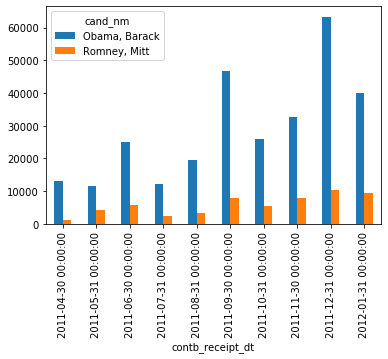

In [149]:
df_vs8.groupby('cand_nm').resample('M')['cand_nm'].count().unstack(level = 0).plot(kind = 'bar')

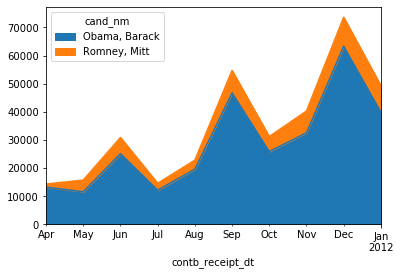

In [150]:
df_vs8.groupby('cand_nm').resample('M')['cand_nm'].count().unstack(level = 0).plot(kind = 'area')